### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>

1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import accuracy_score as acc

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
correlation=data.corr(method='pearson')

Text(0.5, 1.0, 'CORRELATION OF FEATURES')

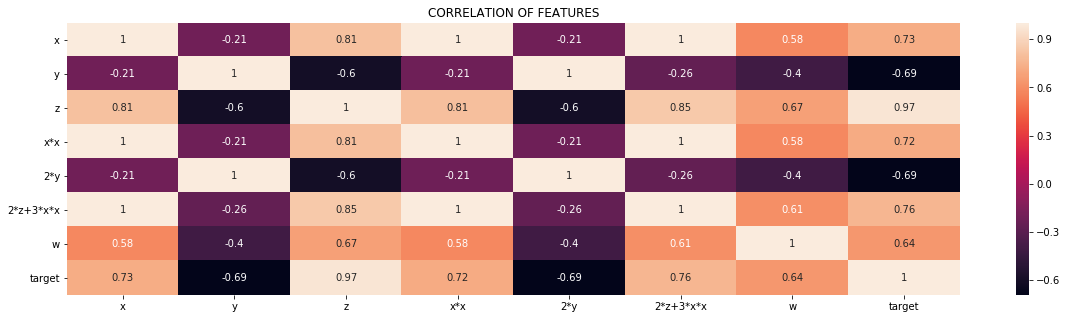

In [5]:
fig,ax=plt.subplots(1,figsize=(20,5))
sns.heatmap(correlation,annot=True,fmt='.2g',ax=ax)
ax.set_title('CORRELATION OF FEATURES')

# Correlation inference


# 'w' is not having high correlation with any of the features, so it ensures FEATURE ORTHOGONALITY and helps more in classification
# 'y' is having positive correlation of 1 with '2y',we have to remove highly correlated features
# 'y' is having neagtive correlation of -0.69 with the 'target', which shows that it does not help much in classification 
# 'z' is having positive correlation of 0.81,0.81 and 0.85 with 'x','x*x' and '2*z+3*x*x' respectively. So highly correlated features reduce 'FEATURE ORTHOGONALITY'
# 'X*X'  is having positive correlation of 1 with 'x' and '2*z+3*x*x', so it needs to be removed
# '2*y' is having positive correlation of 1 with 'y', so it needs to be removed
# '2*z+3*x*x' is having high positive corrrelation of 1 with 'x*x',and 'x', so it reduces 'FEATURE ORTHOGONALITY'

# 'x' ,'2*z+3*x*x' ,'x*x' have positive correlation of 1,'x's correlation with 'y','2y' is negative and not significant.
# so, when x is increasing '2*z+3*x*x' ,'x*x' is also increasing. Highly  correlated features have to be removed to ensure "FEATURE ORTHOGONALITY "
# 'x' is having positive correlation of 0.73 with 'target',which means when x is an important feature for classification

In [6]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

# Logistic Regression

In [7]:
clf = SGDClassifier(eta0=0.001, alpha=0.0001, loss='log', random_state=15, penalty='l2', 
                                         tol=1e-1, learning_rate='optimal')

In [8]:
#Hyperparameter tuning
parameters={'alpha':[0.0001,0.001,0.1,1,10,100]}
clf=GridSearchCV(clf,parameters,cv=3,scoring='accuracy',return_train_score=True)
clf.fit(X,Y)

C:\Users\lenovo\Downloads\anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.001,
                                     fit_intercept=True, l1_ratio=0.15,
                                     learning_rate='optimal', loss='log',
                                     max_iter=1000, n_iter_no_change=5,
                                     n_jobs=None, penalty='l2', power_t=0.5,
                                     random_state=15, shuffle=True, tol=0.1,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [9]:
clf.best_params_

{'alpha': 0.0001}

# The best hyperparameter in the logistic regrssion model is , lambda=0.0001

In [10]:
results=pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

In [11]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.003333,0.002357,0.001667,0.002357,0.0001,{'alpha': 0.0001},1.000000,1.000000,1.00000,1.00,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.003333,0.002357,0.000000,0.000000,0.001,{'alpha': 0.001},1.000000,1.000000,1.00000,1.00,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.001667,0.002357,0.001667,0.002357,0.1,{'alpha': 0.1},1.000000,1.000000,1.00000,1.00,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.000000,0.000000,0.001667,0.002357,1,{'alpha': 1},1.000000,1.000000,0.96875,0.99,0.014577,4,1.000000,1.000000,0.985294,0.995098,0.006932
4,0.000000,0.000000,0.001667,0.002357,10,{'alpha': 10},0.676471,0.705882,0.53125,0.64,0.075581,5,0.636364,0.606061,0.588235,0.610220,0.019867
5,0.000000,0.000000,0.001667,0.002357,100,{'alpha': 100},0.500000,0.500000,0.50000,0.50,0.000000,6,0.500000,0.500000,0.500000,0.500000,0.000000


In [12]:
# Fitting the best model
best_clf = SGDClassifier(eta0=0.001, alpha=0.0001, loss='log', random_state=15, penalty='l2', 
                                         tol=1e-1, learning_rate='optimal')

In [13]:
best_clf.fit(X,Y)
y_pred=clf.predict(X)
accuracy=acc(Y,y_pred)
print('accuracy:',accuracy)

accuracy: 1.0


In [14]:
print('weights of best classifier:',best_clf.coef_)

weights of best classifier: [[ 6.55745721 -7.56085284 15.0776203   5.6209984  -7.56085284  6.8793044
   8.26861739]]


# <center> Adding NOISE

In [15]:
X=pd.DataFrame(X)
X.head(2)

,0,1,2,3,4,5,6
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364


In [16]:
X=X+0.01
X.head(2)

,0,1,2,3,4,5,6
0,-0.571066,0.851837,-1.002978,-0.594025,0.851837,-0.655927,-0.526277
1,-0.884309,-0.197835,-1.002978,-0.873052,-0.197835,-0.907054,-0.512364


In [17]:
X_=np.array(X)

In [18]:
# Hyperparameter tuning
clf = SGDClassifier(eta0=0.001, alpha=0.0001, loss='log', random_state=15, penalty='l2', 
                                         tol=1e-1, learning_rate='optimal')

parameters={'alpha':[0.0001,0.001,0.1,1,10,100]}
clf=GridSearchCV(clf,parameters,cv=3,scoring='accuracy',return_train_score=True)
clf.fit(X_,Y)

clf.best_params_

C:\Users\lenovo\Downloads\anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.0001}

# The best hyperparameter in the logistic regrssion model is , lambda=0.0001

In [19]:
# Fitting the best model
best_clf_edited = SGDClassifier(eta0=0.001, alpha=0.0001, loss='log', random_state=15, penalty='l2', 
                                         tol=1e-1, learning_rate='optimal')

best_clf_edited.fit(X_,Y)
y_pred=best_clf_edited.predict(X_)
accuracy=acc(Y,y_pred)
print('accuracy of best model edited:',accuracy)

print('weights of best model edited:',best_clf_edited.coef_)

accuracy of best model edited: 1.0
weights of best model edited: [[ 6.57220183 -7.29356531 14.98328774  5.64423978 -7.29356531  6.88838672
   8.1317581 ]]


# Difference in weights of data without noise and with noise

In [20]:
Difference=best_clf.coef_-best_clf_edited.coef_
print('DIFFERENCE IN WEIGHTS:',Difference)

DIFFERENCE IN WEIGHTS: [[-0.01474462 -0.26728753  0.09433256 -0.02324138 -0.26728753 -0.00908232
   0.13685929]]


In [21]:
Difference_in_percent=(best_clf.coef_-best_clf_edited.coef_)*100/best_clf.coef_
percentage_difference=(np.abs(Difference_in_percent))
indices=np.argsort(percentage_difference)

percentage_difference

array([[0.22485268, 3.53515055, 0.62564623, 0.41347426, 3.53515055,
        0.1320238 , 1.65516531]])

In [22]:
indices

array([[5, 0, 3, 2, 6, 1, 4]], dtype=int64)

In [23]:
# Top 4 features with percentage difference in their weights
columns=data.columns
print('Top 4 Features with high difference in weights after adding noise:',columns[[2,6,1,4]].values.tolist())

Top 4 Features with high difference in weights after adding noise: ['z', 'w', 'y', '2*y']


# <center> SVM

In [44]:

svm_clf = SGDClassifier(eta0=0.001, alpha=0.0001, loss='hinge', random_state=15, penalty='l2', 
                                         tol=1e-1, learning_rate='optimal')

In [45]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1, 10,100,1000]}# here 'alpha' is 'C', which is used in SVM
svm_clf=GridSearchCV(svm_clf,parameters,cv=3,scoring='accuracy',return_train_score=True)


In [46]:
svm_clf.fit(X,Y)

C:\Users\lenovo\Downloads\anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.001,
                                     fit_intercept=True, l1_ratio=0.15,
                                     learning_rate='optimal', loss='hinge',
                                     max_iter=1000, n_iter_no_change=5,
                                     n_jobs=None, penalty='l2', power_t=0.5,
                                     random_state=15, shuffle=True, tol=0.1,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

#  Best parameters

In [47]:
svm_clf.best_params_

{'alpha': 0.0001}

In [48]:
# Fitting the best model
best_clf = SGDClassifier(eta0=0.0001,alpha=0.0001,loss='hinge', random_state=15, penalty='l2', 
                         tol=1e-1, learning_rate='optimal')

best_clf.fit(X,Y)
y_pred=best_clf.predict(X)
accuracy=acc(Y,y_pred)
print('accuracy:',accuracy)

print('weights of best classifier:',best_clf.coef_)

accuracy: 1.0
weights of best classifier: [[ 9.21845423 -8.64944756 18.3640633   8.21152005 -8.64944756  9.60757726
   8.21238665]]


# <center> Adding NOISE

In [49]:
# Hyperparameter tuning in SVM
svm_clf = SGDClassifier(eta0=0.001, alpha=0.0001, loss='hinge', random_state=15, penalty='l2', 
                                         tol=1e-1, learning_rate='optimal')
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1, 10,100,1000]} # here 'alpha' is 'C', which is used in SVM
svm_clf=GridSearchCV(svm_clf,parameters,cv=3,scoring='accuracy',return_train_score=True)
svm_clf.fit(X_,Y) # fitting 'X_'

C:\Users\lenovo\Downloads\anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.001,
                                     fit_intercept=True, l1_ratio=0.15,
                                     learning_rate='optimal', loss='hinge',
                                     max_iter=1000, n_iter_no_change=5,
                                     n_jobs=None, penalty='l2', power_t=0.5,
                                     random_state=15, shuffle=True, tol=0.1,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [50]:
svm_clf.best_params_

{'alpha': 0.0001}

# The best hyperparameter in the SVM model is , C or alpha=0.0001

In [51]:
# Fitting the best model
best_clf_edited = SGDClassifier(eta0=0.001, alpha=0.0001, loss='hinge', random_state=15, penalty='l2', 
                                         tol=1e-1, learning_rate='optimal')

best_clf_edited.fit(X_,Y)
y_pred=best_clf_edited.predict(X_)
accuracy=acc(Y,y_pred)
print('accuracy of best model edited:',accuracy)

print('weights of best model edited:',best_clf_edited.coef_)


accuracy of best model edited: 1.0
weights of best model edited: [[ 9.21845423 -8.64944756 18.3640633   8.21152005 -8.64944756  9.60757726
   8.21238665]]


In [52]:
# Difference in weights of data without noise and with noise
Difference=abs(best_clf.coef_-best_clf_edited.coef_)
print('DIFFERENCE IN WEIGHTS:',Difference)

DIFFERENCE IN WEIGHTS: [[0. 0. 0. 0. 0. 0. 0.]]


# There is no difference in weights after adding noise in data for SVM classifier. So the classifier performs well in case of less impact of noise (0.01)

# <center>  OBSERVATIONS 

# WEIGHTS IN LOGISTIC REGRESSION
## The maximum percentage difference in weights with and without NOISE is 3.53% and minimum is 0.13%


# WEIGHTS IN SVM
## The  percentage difference in weights with and without NOISE is zero(0)

# In LOGISTIC REGRESSION we have huge difference in weights whereas, SVM CLASSIFIER shows NO change.
# So, SVM performs well in presence of COLLINEAR FEATURES AND SMALL NOISE as well, than SVM